In [147]:
library(ggplot2)
library(reshape2)
library(lattice)

### Basic plots

In [1]:
head(mtcars)

mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1

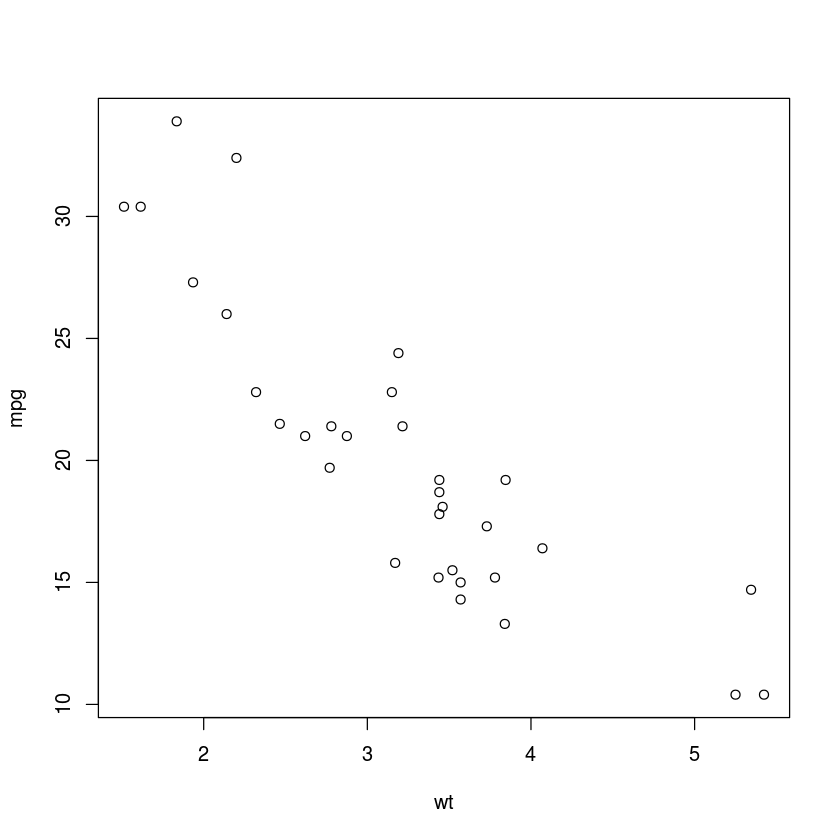

In [2]:
with(mtcars, plot(wt, mpg))

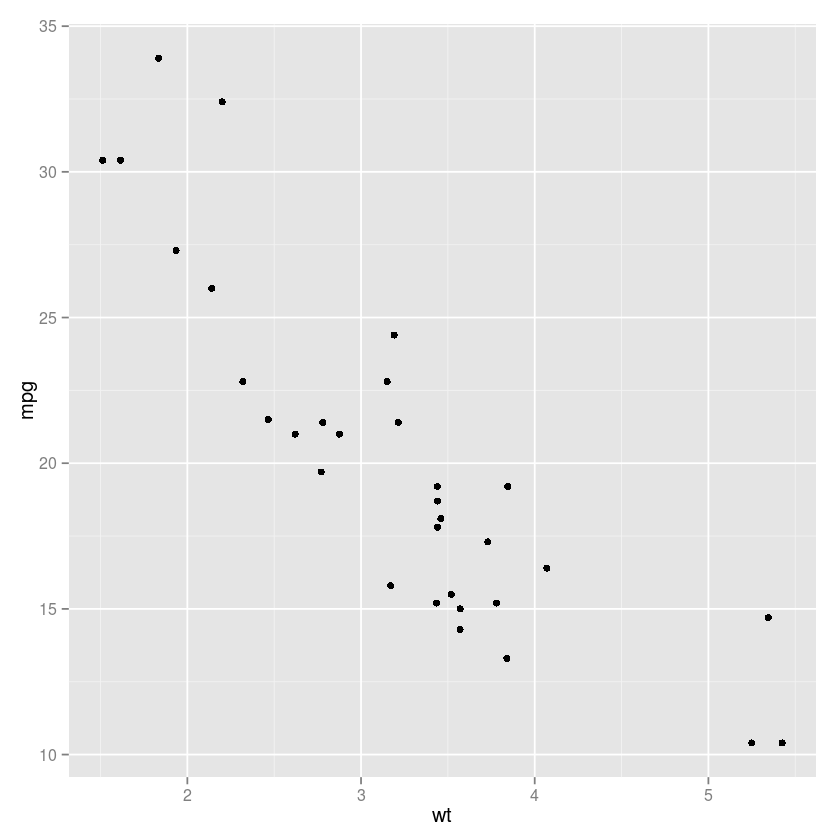

In [3]:
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()

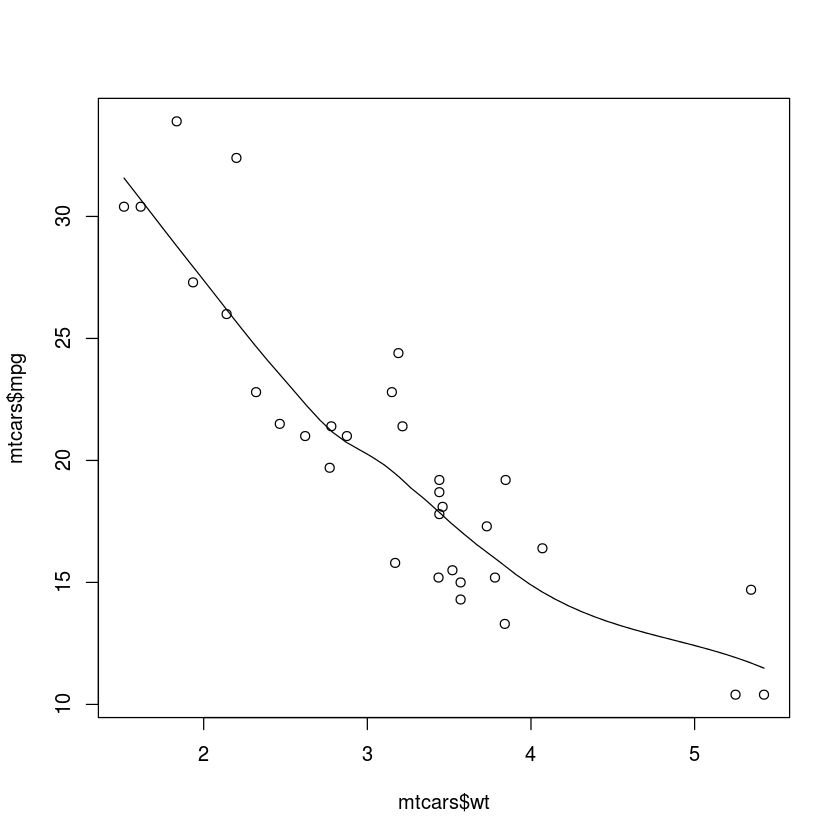

In [3]:
scatter.smooth(mtcars$wt, mtcars$mpg)

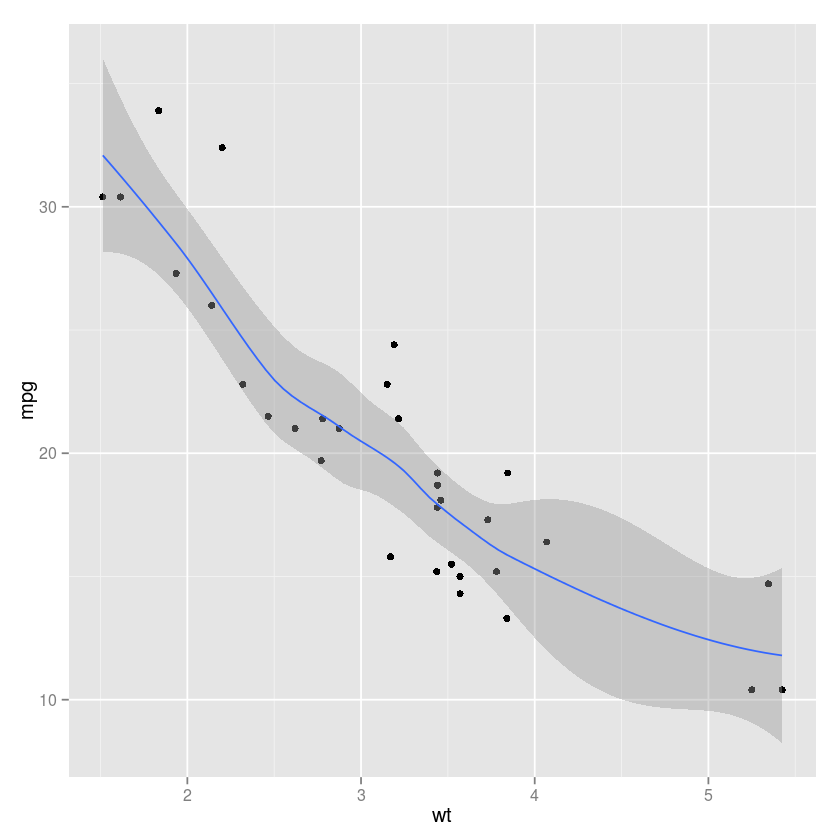

In [4]:
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point() + geom_smooth(method=loess)

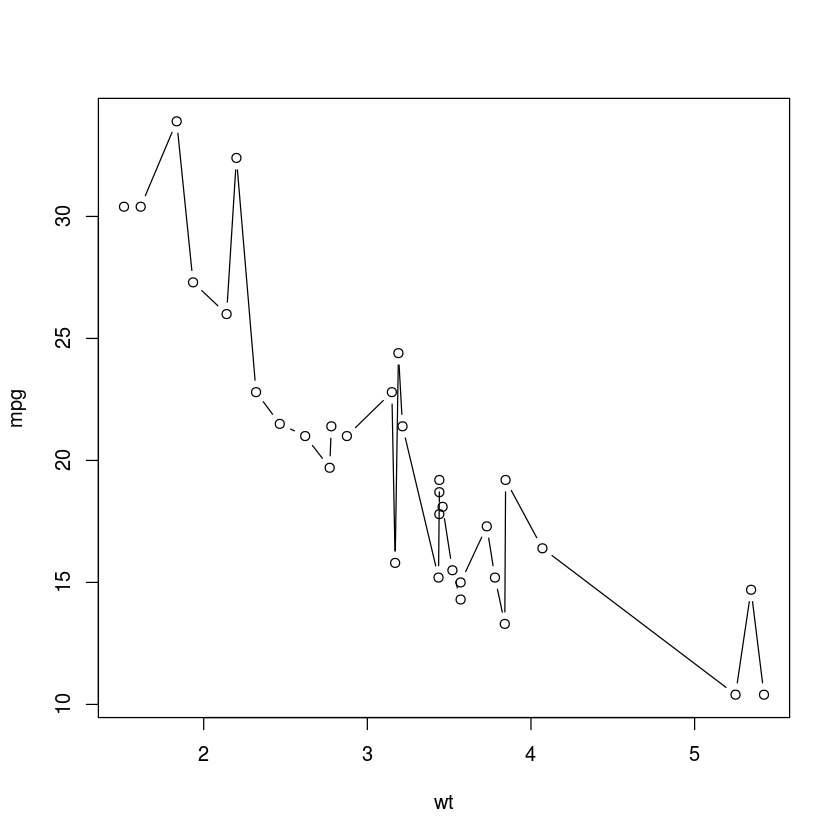

In [4]:
df <- mtcars[order(mtcars$wt),]
with(df, plot(wt, mpg, type="b"))

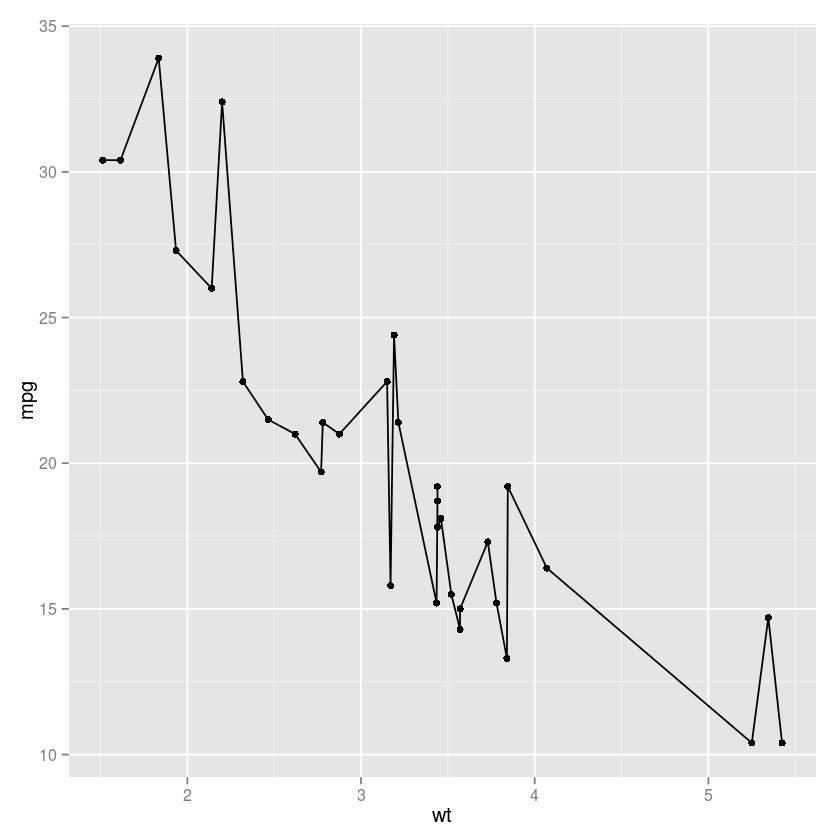

In [5]:
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point() + geom_line()

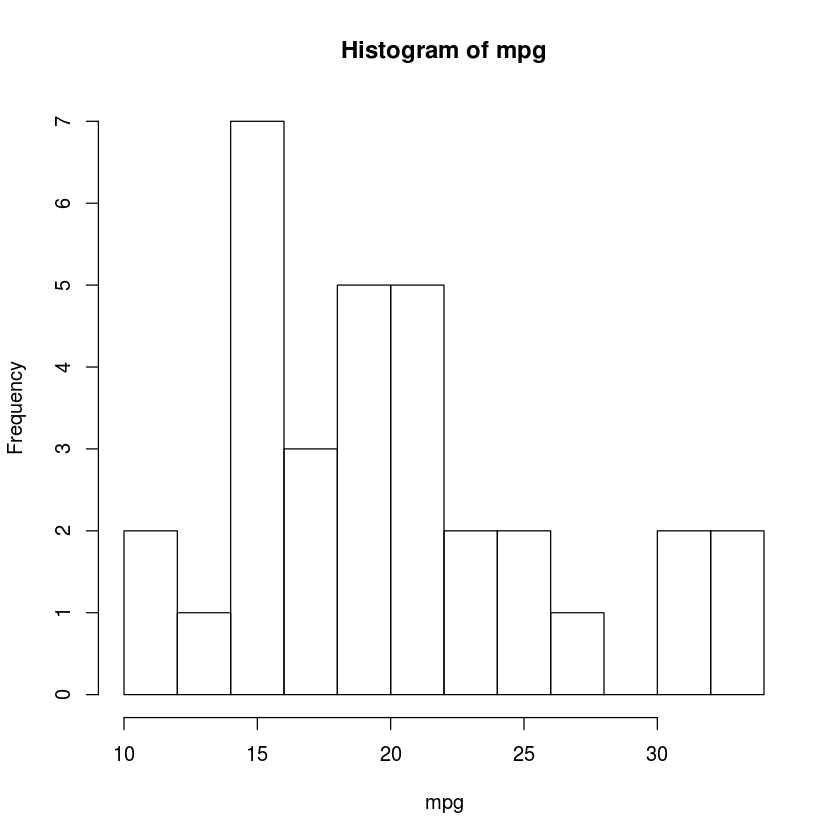

In [5]:
with(mtcars, hist(mpg, breaks=10))

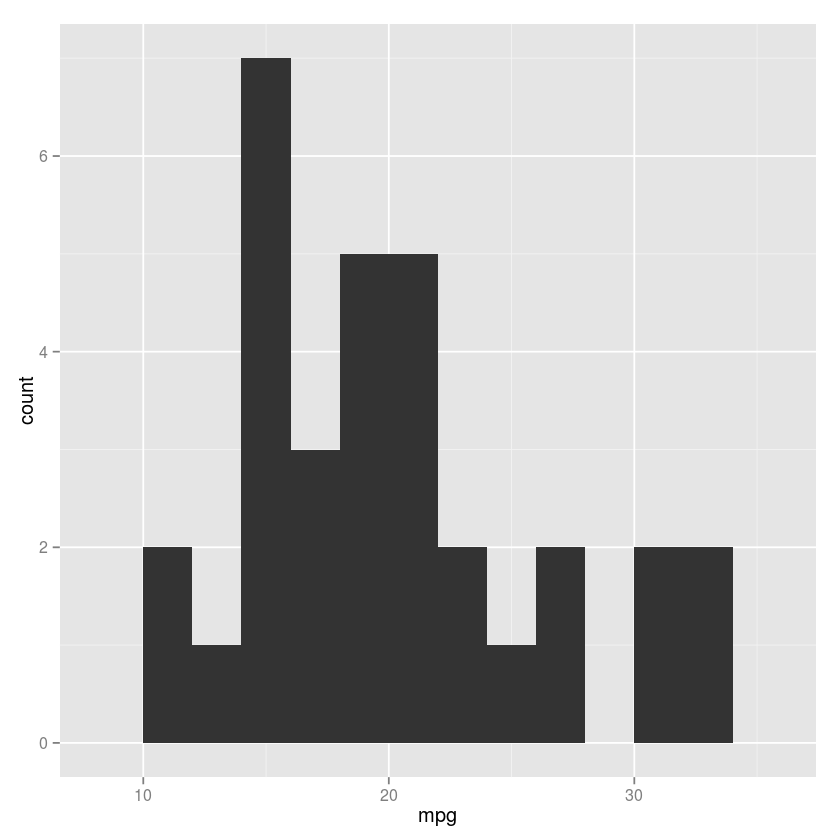

In [9]:
ggplot(mtcars, aes(x=mpg)) + geom_histogram(binwidth=2)

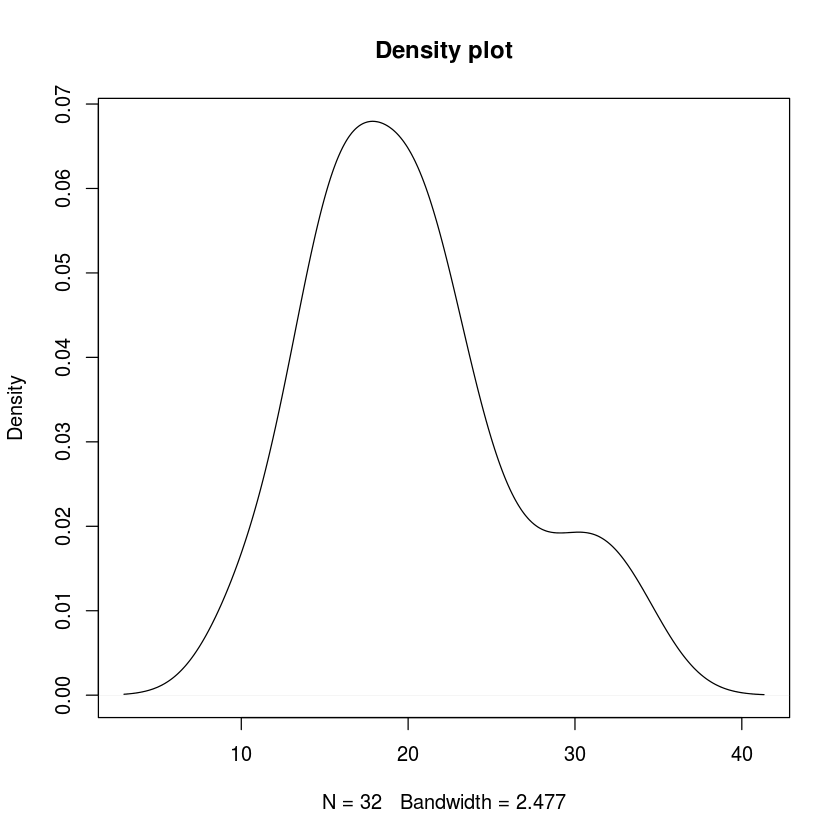

In [6]:
plot(density(mtcars$mpg), main="Density plot")

In [28]:
density(mtcars$mpg)


Call:
	density.default(x = mtcars$mpg)

Data: mtcars$mpg (32 obs.);	Bandwidth 'bw' = 2.477

       x               y            
 Min.   : 2.97   Min.   :6.481e-05  
 1st Qu.:12.56   1st Qu.:5.461e-03  
 Median :22.15   Median :1.926e-02  
 Mean   :22.15   Mean   :2.604e-02  
 3rd Qu.:31.74   3rd Qu.:4.530e-02  
 Max.   :41.33   Max.   :6.795e-02  

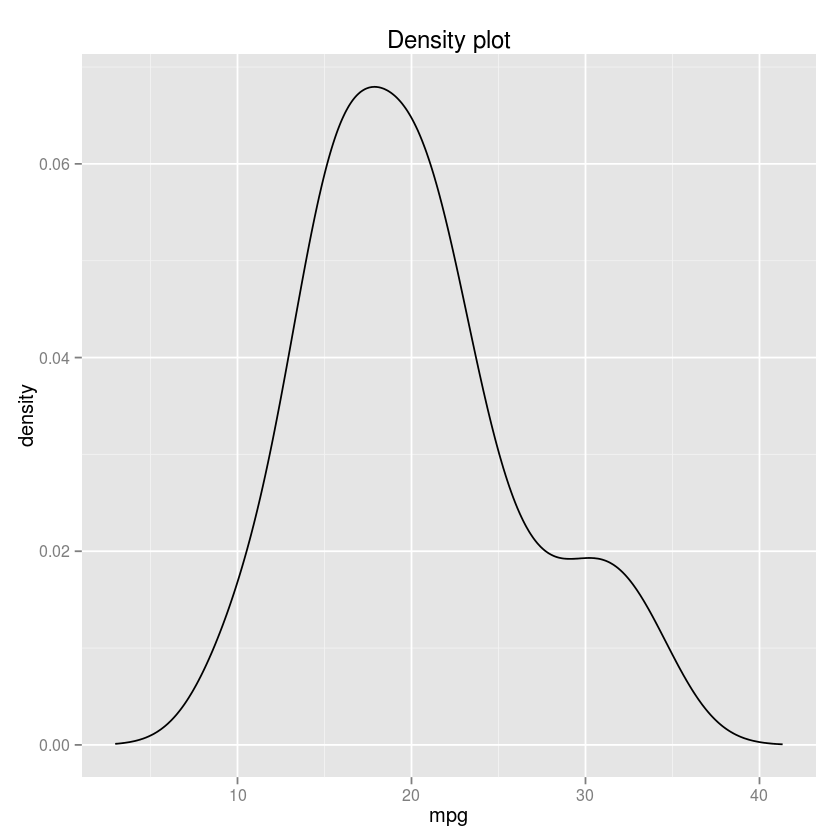

In [35]:
ggplot(mtcars, aes(x=mpg)) + 
geom_line(stat="density") + 
xlim(2.97, 41.33) + 
labs(title="Density plot")

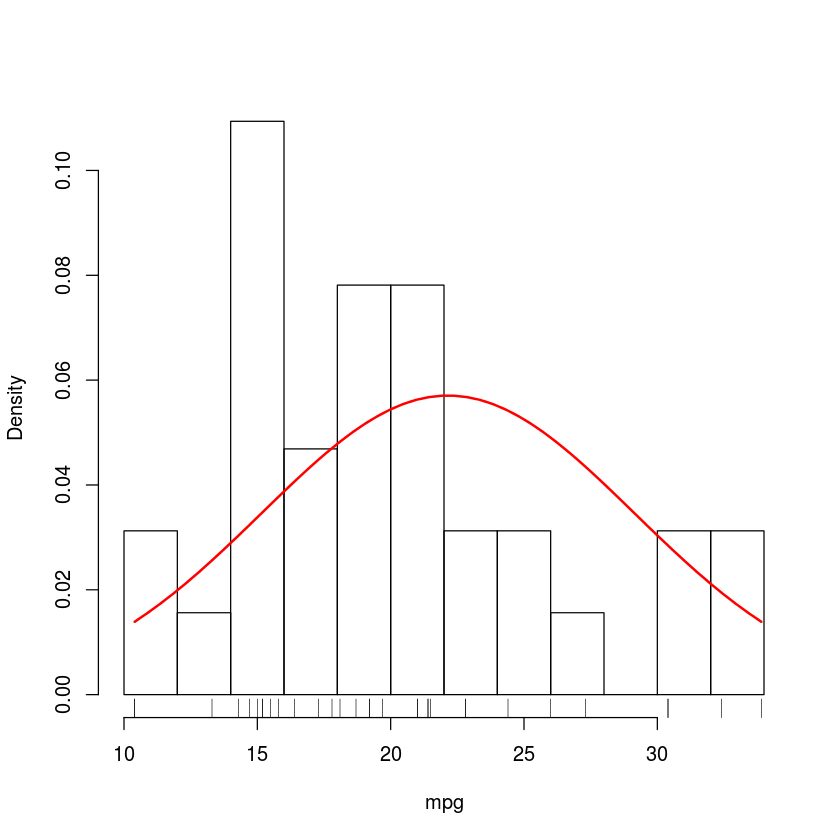

In [7]:
attach(mtcars)
hist(mpg, breaks=10, probability = TRUE, main="")
rug(mpg)
x <- seq(min(mpg), max(mpg), length.out = 50)
lines(x, dnorm(x, mean=mean(x), sd=sd(x)), col="red", lwd=2)
detach(mtcars)

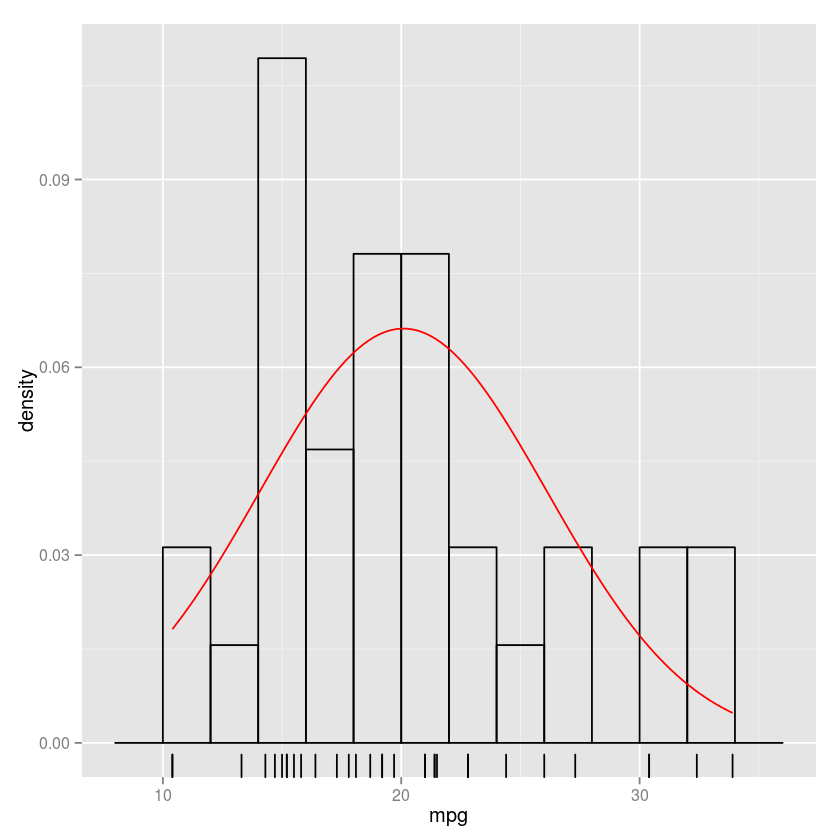

In [45]:
ggplot(mtcars, aes(x=mpg)) + 
geom_histogram(aes(y=..density..), binwidth=2, color="black", alpha=0) +
stat_function(fun = dnorm, arg=list(mean=mean(mtcars$mpg), sd=sd(mtcars$mpg)), color="red") +
geom_rug()

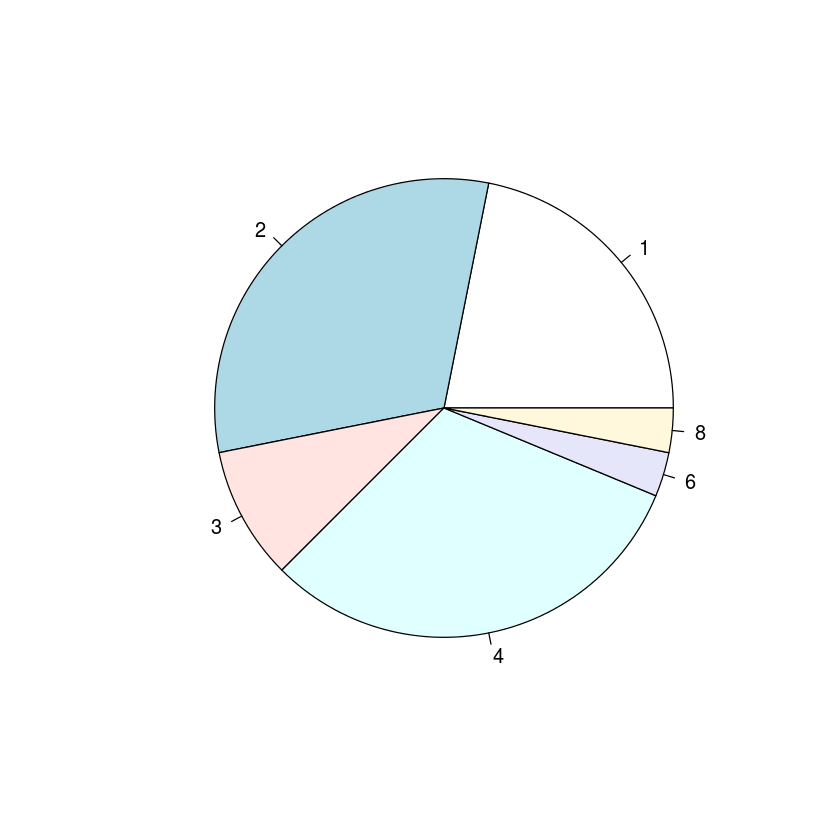

In [8]:
with(mtcars, pie(table(carb)))

In [50]:
df <- data.frame(table(mtcars$carb))
colnames(df) <- c("Carb", "Freq")
df

Carb Freq
1    1    7
2    2   10
3    3    3
4    4   10
5    6    1
6    8    1

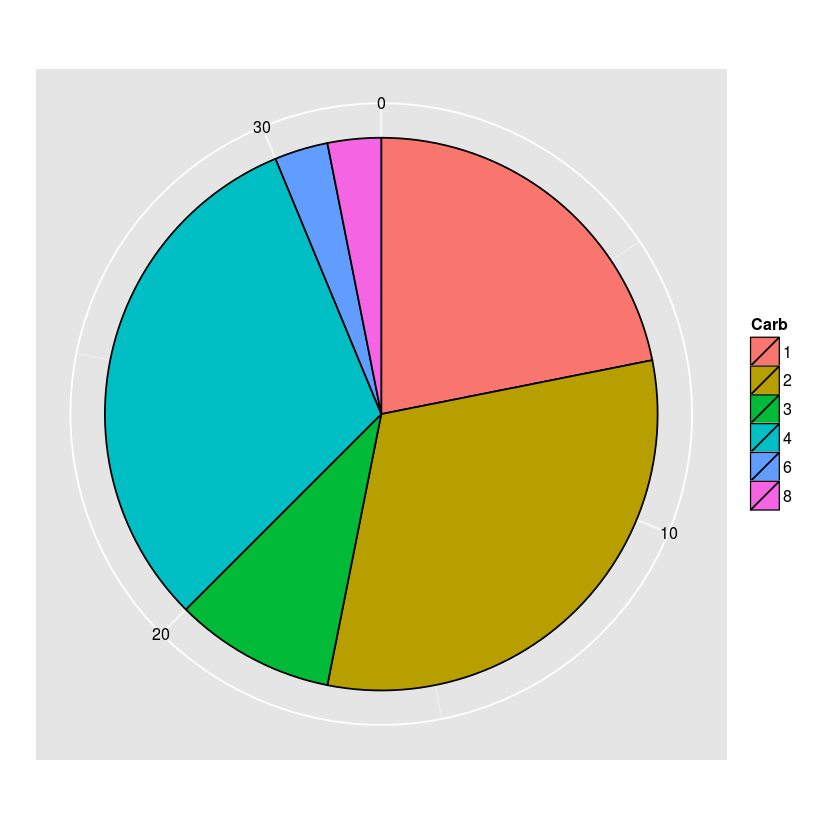

In [60]:
ggplot(df, aes(x=1, y=Freq, fill=Carb)) + 
geom_bar(stat="identity", color="black") +
coord_polar(theta="y") +
theme(axis.ticks=element_blank(),
      axis.text.y=element_blank(),
      axis.text.x=element_text(colour='black'),
      axis.title=element_blank())

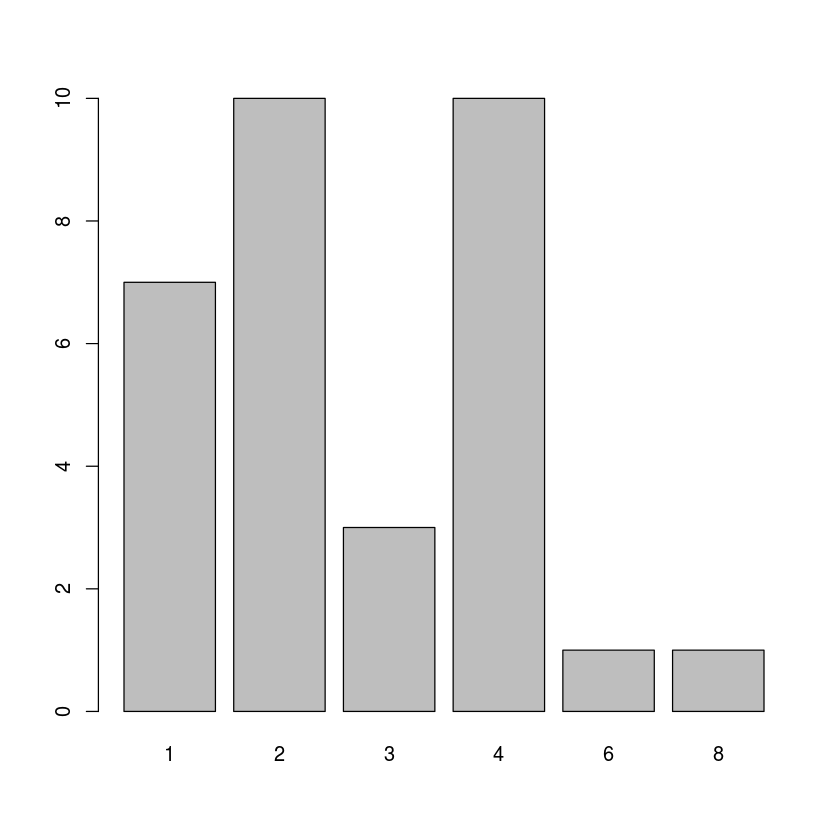

In [9]:
with(mtcars, barplot(table(carb)))

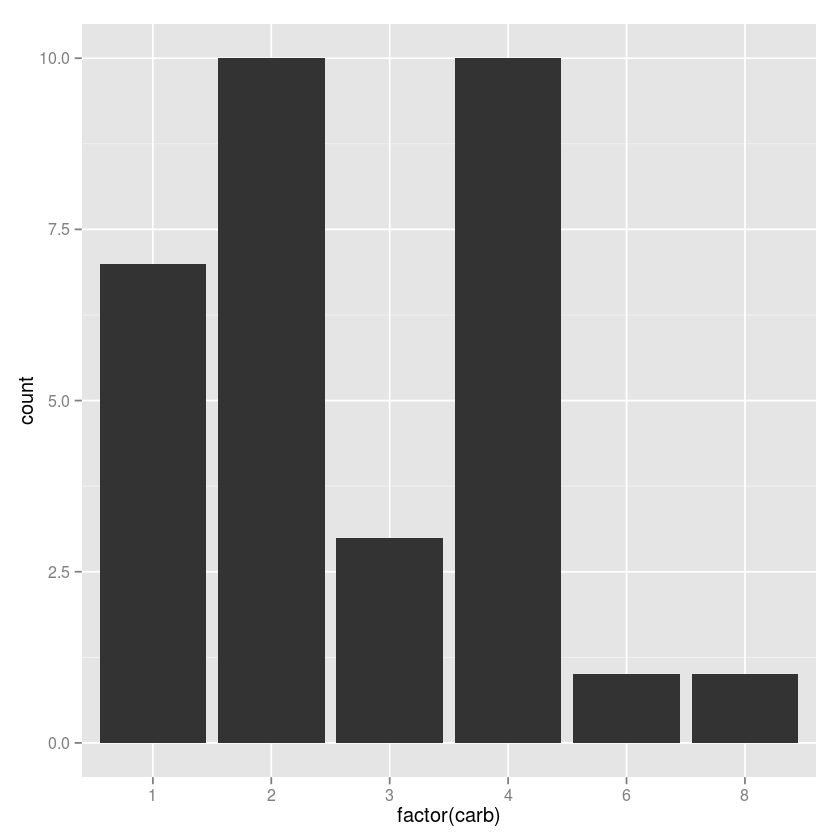

In [64]:
ggplot(mtcars, aes(x=factor(carb))) +
geom_bar()

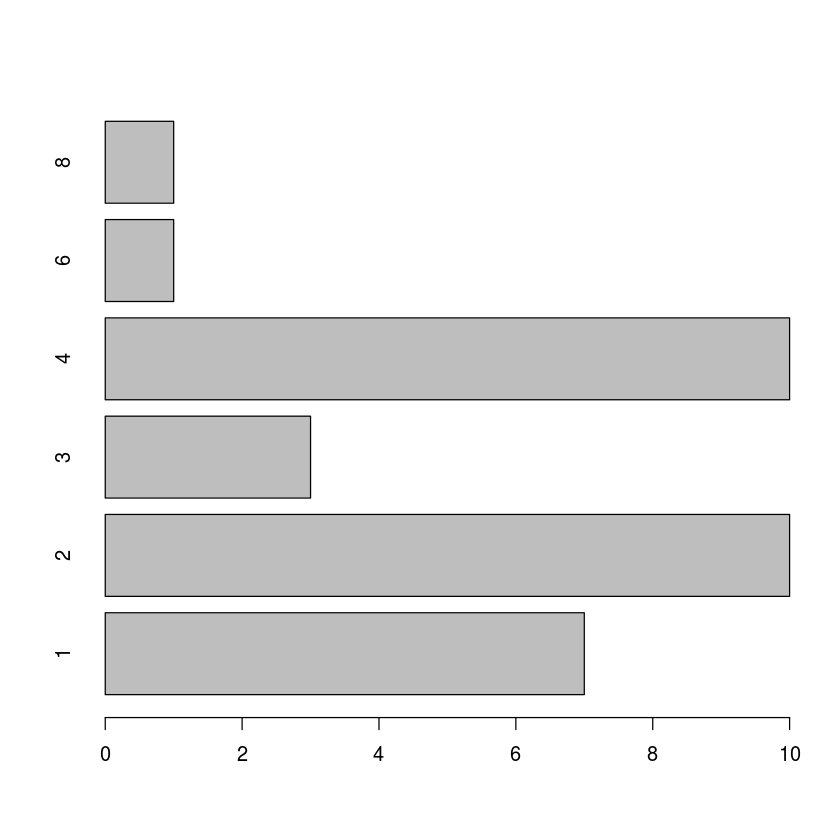

In [10]:
with(mtcars, barplot(table(carb), horiz=TRUE))

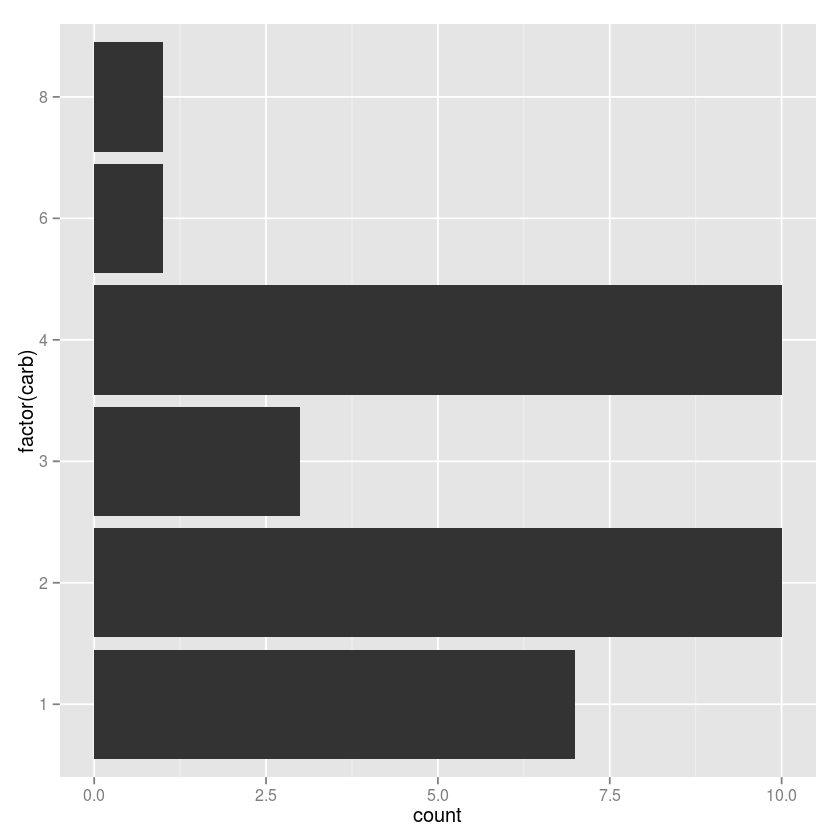

In [63]:
ggplot(mtcars, aes(x=factor(carb))) +
geom_bar() +
coord_flip()

    am
carb 0 1
   1 3 4
   2 6 4
   3 3 0
   4 7 3
   6 0 1
   8 0 1

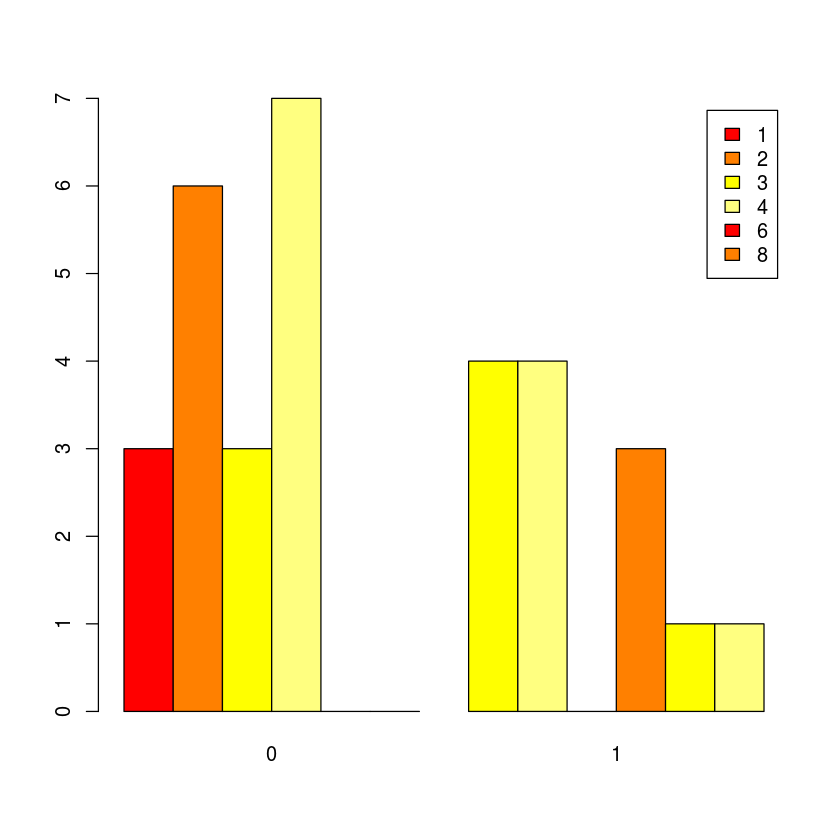

In [11]:
attach(mtcars)
(tbl <- table(carb, am))
barplot(tbl, beside=TRUE, legend=rownames(tbl), col=heat.colors(carb))
detach(mtcars)

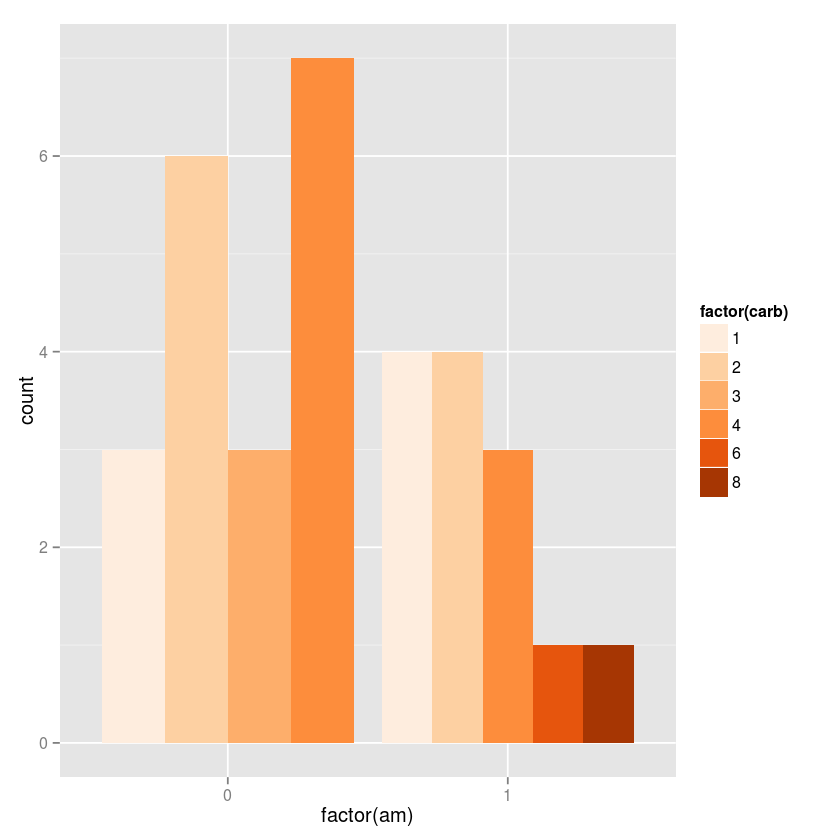

In [82]:
#  Threebartable = as.data.frame(table(simData$FacVar1, simData$FacVar2, simData$FacVar3)) ## CrossTab
# ggplot(Threebartable,aes(x=Var3,y=Freq,fill=Var2))+geom_bar(position="dodge")+facet_wrap(~Var1) ## Bar plot with facetting

ggplot(mtcars, aes(x=factor(am), fill=factor(carb))) +
geom_bar(position="dodge") +
scale_fill_brewer(palette="Oranges")

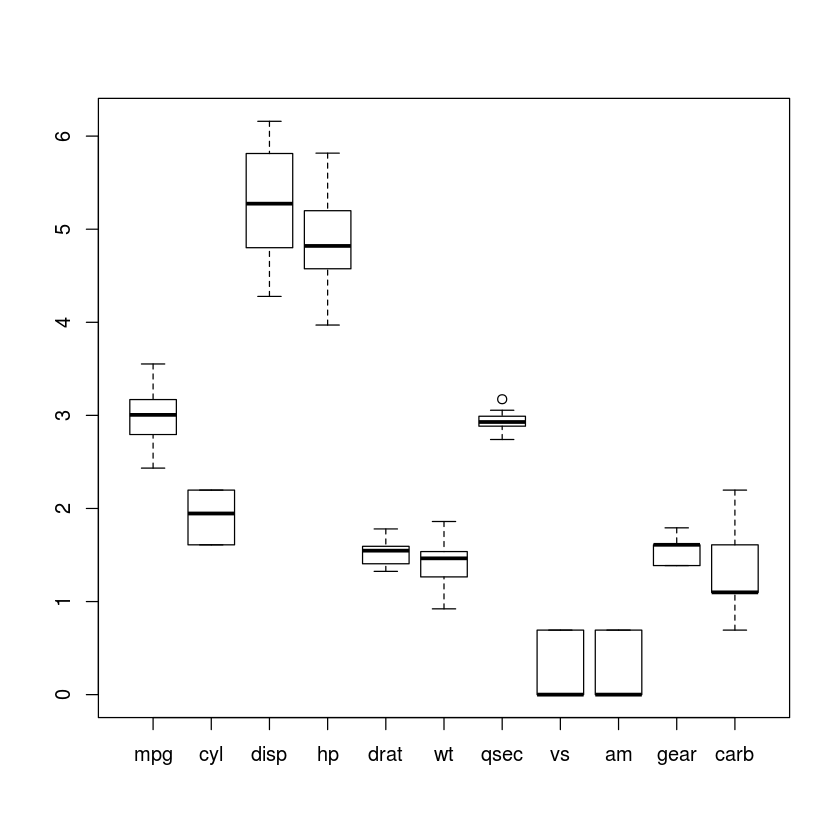

In [12]:
boxplot(log1p(mtcars))

In [93]:
head(mtcars)

mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1

No id variables; using all as measure variables


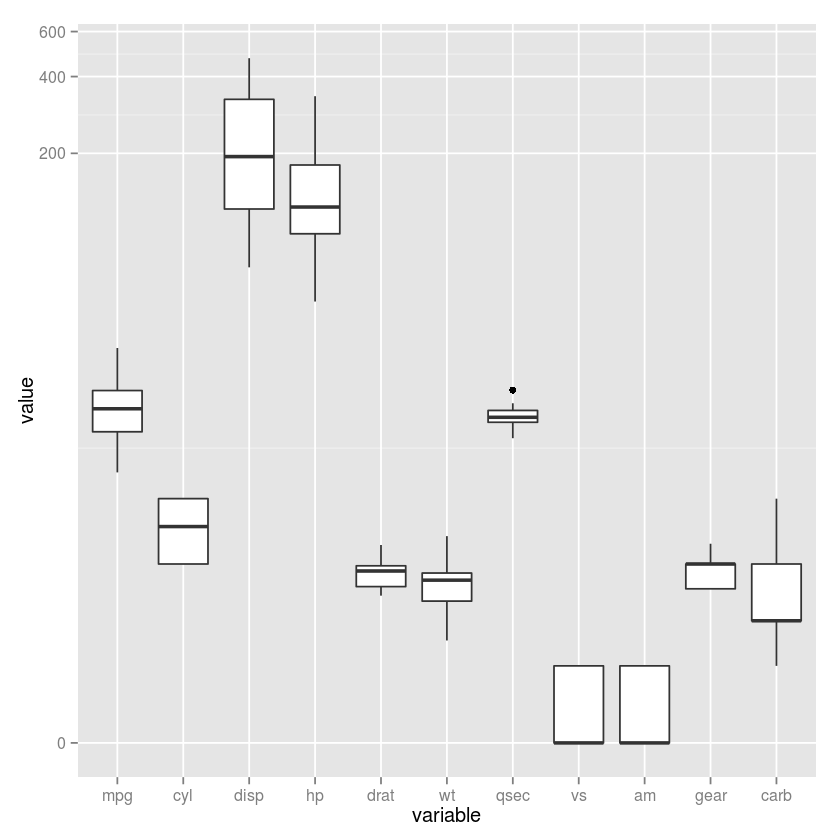

In [96]:
df <- melt(mtcars)
ggplot(df, aes(x=variable, y=value)) +
geom_boxplot() +
scale_y_continuous(trans="log1p")

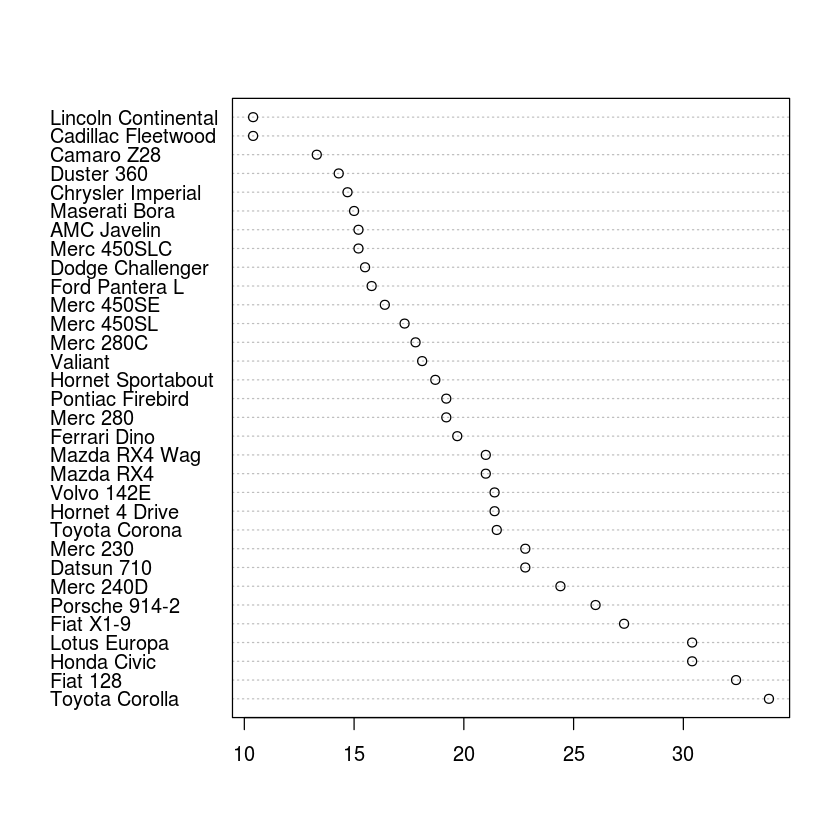

In [13]:
df <- mtcars[order(-mtcars$mpg),]
dotchart(df$mpg, labels=row.names(df))

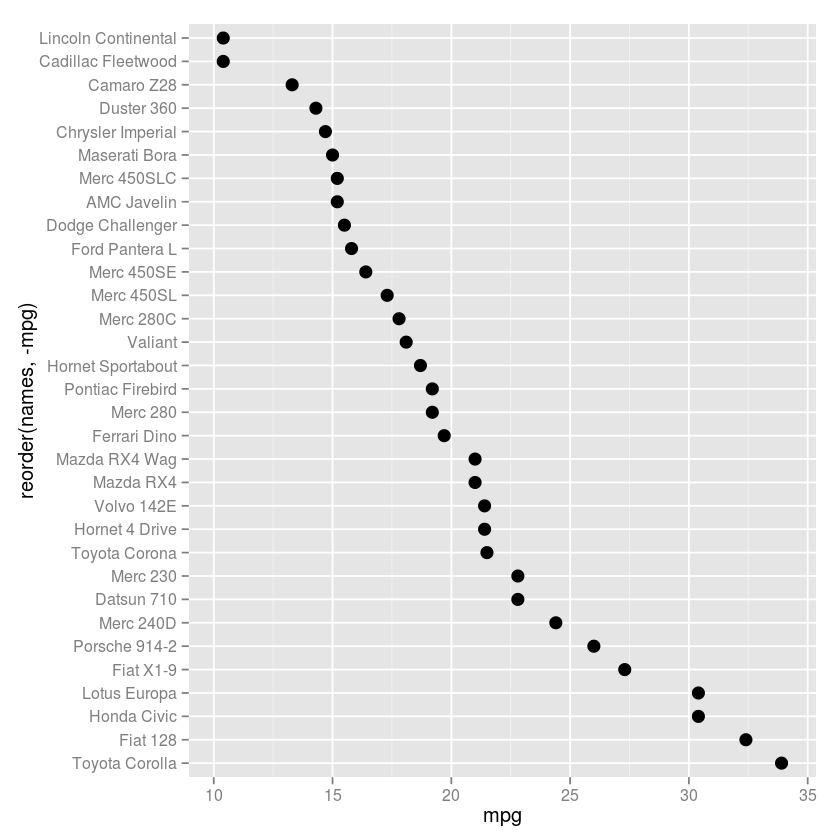

In [114]:
df <- mtcars[order(-mtcars$mpg),]
df$names <- as.factor(rownames(df))
ggplot(df, aes(x=reorder(names, -mpg), y=mpg)) + 
geom_dotplot(binaxis="y", stackdir="center", binwidth=0.5) +
coord_flip()

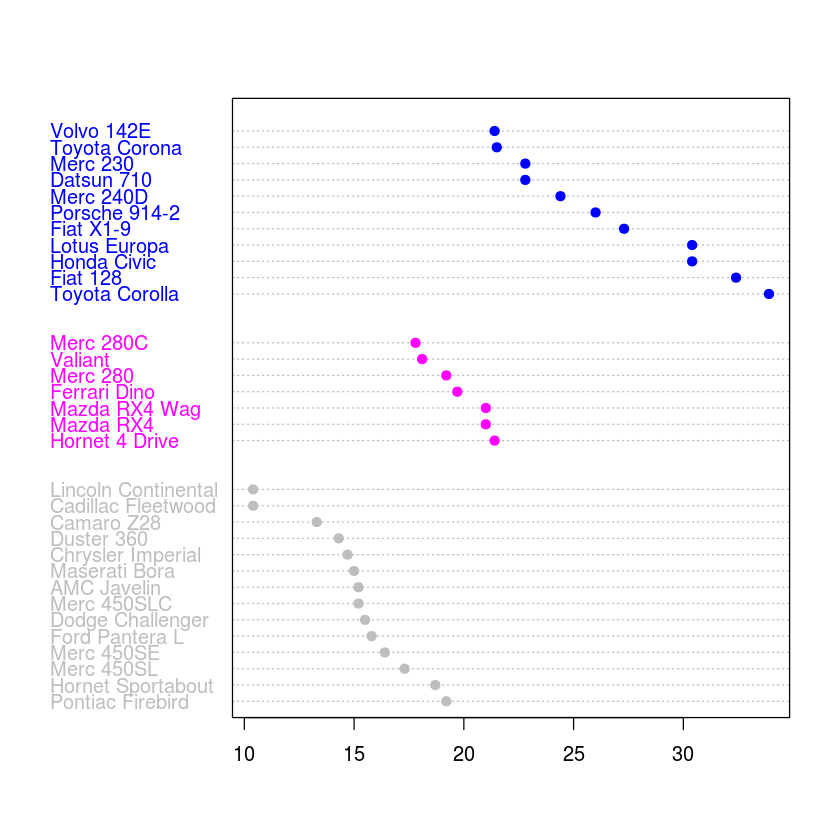

In [14]:
dotchart(df$mpg, labels=row.names(df), groups=df$cyl, color=df$cyl, pch=19)

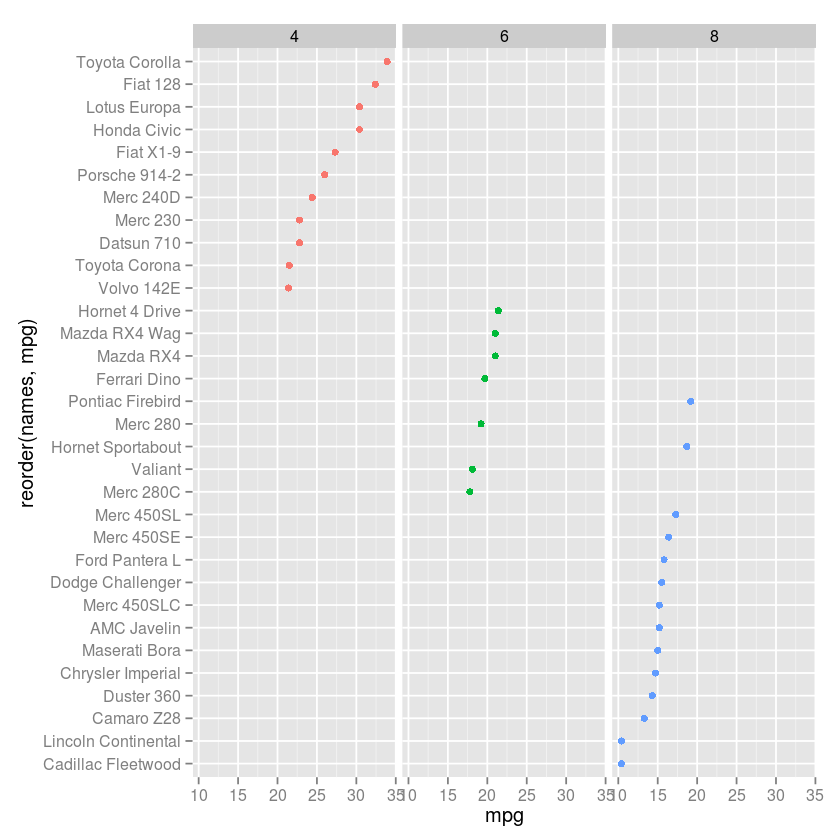

In [181]:
ggplot(df, aes(x=reorder(names, mpg), y=mpg, col=factor(cyl))) + 
geom_point() + 
facet_grid(. ~ cyl) + 
guides(col=FALSE) +
coord_flip()

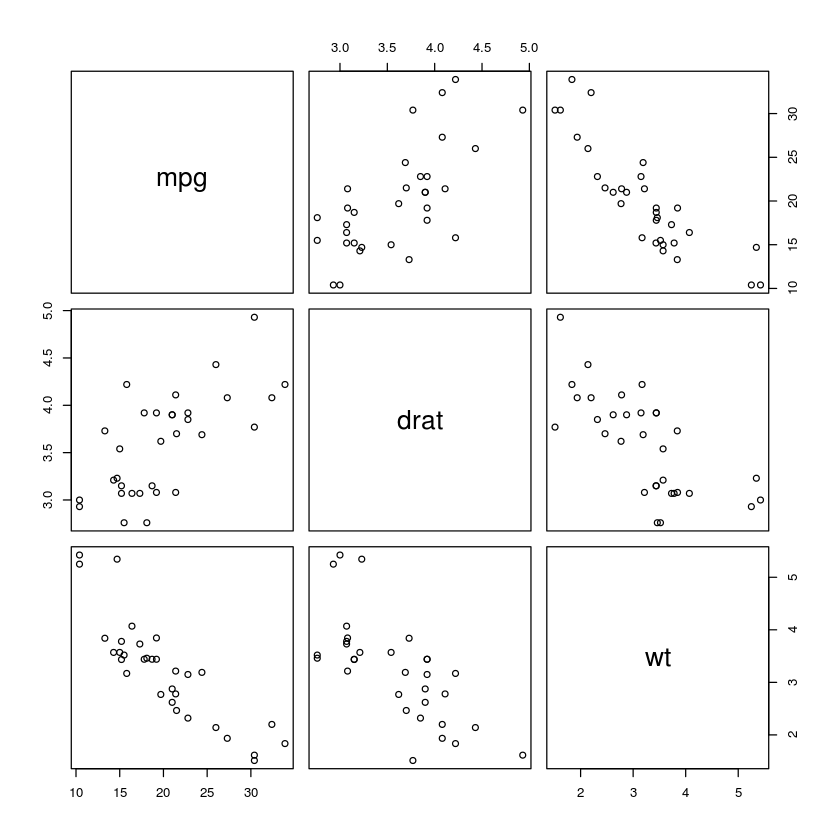

In [168]:
pairs(~mpg + drat + wt, data=mtcars)

**Note**: `splom` is from the lattice package - ggpolot does not do scatterplot matrices

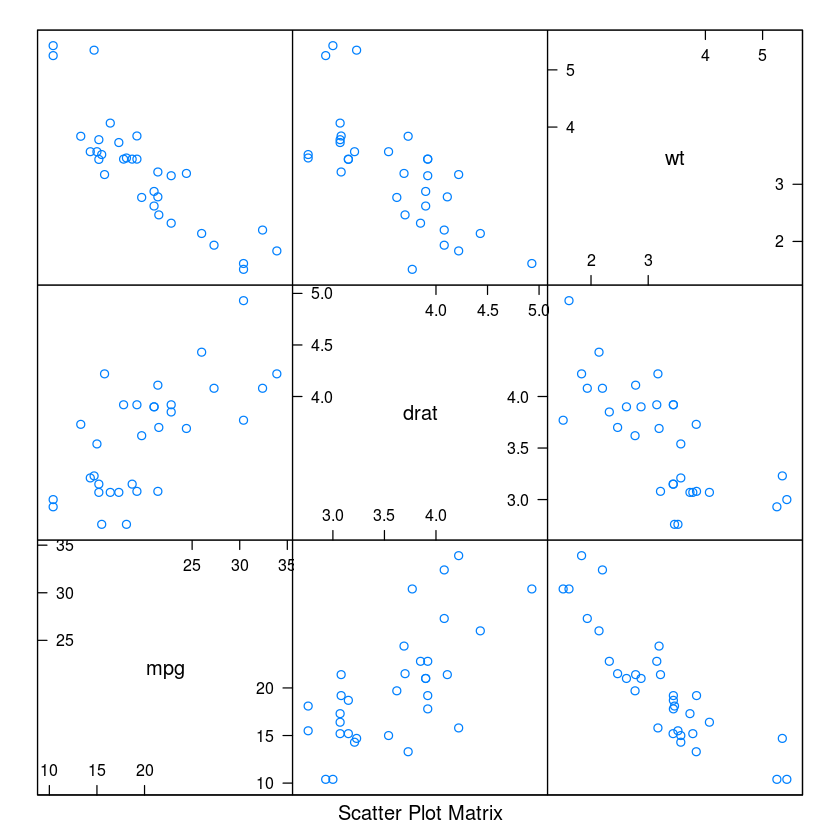

In [183]:
splom(mtcars[, c("mpg", "drat", "wt")])